In [1]:
import os
import json

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [2]:
# Read the file
doc = DocumentFile.from_images("receipt3.jpeg")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [3]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

In [4]:
result = predictor(doc)

# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (600, 600), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.2734375, 0.0), (0.6875, 0.1162109375)), 'lines': [{'geometry': ((0.33984375, 0.0), (0.6171875, 0.0234375)), 'words': [{'value': '#01-901', 'confidence': 0.9932250380516052, 'geometry': ((0.33984375, 0.001953125), (0.416015625, 0.0234375))}, {'value': 'SINGAPORE', 'confidence': 0.9812156558036804, 'geometry': ((0.4208984375, 0.001953125), (0.54296875, 0.01953125))}, {'value': '380011', 'confidence': 0.562835156917572, 'geometry': ((0.5458984375, 0.0), (0.6171875, 0.017578125))}]}, {'geometry': ((0.2734375, 0.017578125), (0.6875, 0.05078125)), 'words': [{'value': 'GST', 'confidence': 0.9999666213989258, 'geometry': ((0.2734375, 0.02734375), (0.3212890625, 0.0498046875))}, {'value': 'Reg:', 'confidence': 0.9997168183326721, 'geometry': ((0.322265625, 0.02734375), (0.3671875, 0.05078125))}, {'value': 'M2-006533

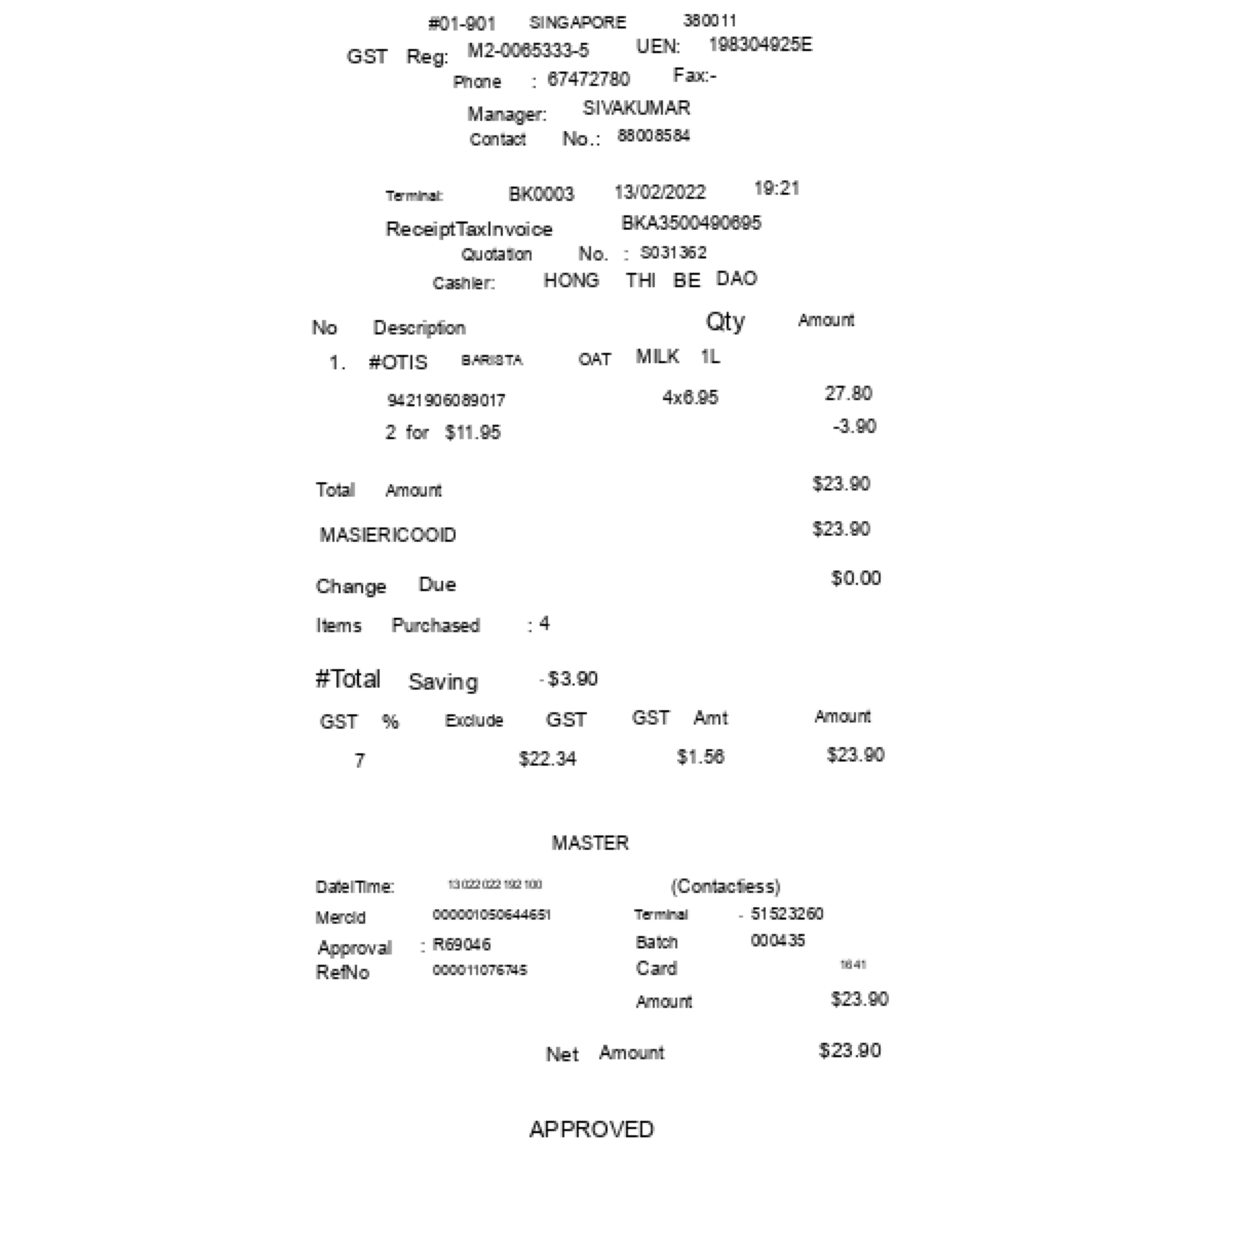

In [5]:
synthetic_pages = result.synthesize()
plt.figure(figsize=(18, 16))  # Adjust the width and height as needed
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

In [7]:
# Define a function to remove fields recursively
def remove_fields(obj, fields):
    if isinstance(obj, list):
        for item in obj:
            remove_fields(item, fields)
    elif isinstance(obj, dict):
        for key in list(obj.keys()):
            if key in fields:
                del obj[key]
            else:
                remove_fields(obj[key], fields)

# Function to remove 'geometry' key from 'blocks' and 'lines'
def remove_geometry(data):
    if isinstance(data, list):
        for item in data:
            remove_geometry(item)
    elif isinstance(data, dict):
        if 'geometry' in data:
            del data['geometry']
        for key, value in data.items():
            remove_geometry(value)

# Fields to remove
fields_to_remove = ['confidence', 'page_idx', 'dimensions', 'orientation', 'language', 'artefacts']

# Remove the specified fields
remove_fields(json_export, fields_to_remove)

# Remove 'geometry' from 'blocks' and 'lines'
for page in json_export['pages']:
    for block in page['blocks']:
        if 'geometry' in block:
            del block['geometry']
        for line in block.get('lines', []):
            if 'geometry' in line:
                del line['geometry']

# Convert the modified data back to JSON
modified_json = json.dumps(json_export, separators=(',', ':'))

# Print the modified JSON
print(modified_json)


{"pages":[{"blocks":[{"lines":[{"words":[{"value":"#01-901","geometry":[[0.33984375,0.001953125],[0.416015625,0.0234375]]},{"value":"SINGAPORE","geometry":[[0.4208984375,0.001953125],[0.54296875,0.01953125]]},{"value":"380011","geometry":[[0.5458984375,0.0],[0.6171875,0.017578125]]}]},{"words":[{"value":"GST","geometry":[[0.2734375,0.02734375],[0.3212890625,0.0498046875]]},{"value":"Reg:","geometry":[[0.322265625,0.02734375],[0.3671875,0.05078125]]},{"value":"M2-0065333-5","geometry":[[0.3720703125,0.0234375],[0.5087890625,0.0439453125]]},{"value":"UEN:","geometry":[[0.5087890625,0.0205078125],[0.5625,0.0419921875]]},{"value":"198304925E","geometry":[[0.56640625,0.017578125],[0.6875,0.0380859375]]}]},{"words":[{"value":"Phone","geometry":[[0.3603515625,0.0498046875],[0.423828125,0.068359375]]},{"value":":","geometry":[[0.423828125,0.0478515625],[0.4404296875,0.0693359375]]},{"value":"67472780","geometry":[[0.4365234375,0.0458984375],[0.5380859375,0.0673828125]]},{"value":"Fax:-","geome

In [8]:
#Convert the JSON data to a string
json_export_str = str(modified_json)

# Write the JSON data to a file
with open("OCR.txt", "w") as file:
    file.write(json_export_str)